In [8]:
import pandas as pd
from aeon.visualisation import plot_critical_difference

In [9]:
df = pd.read_json("results/multivariate/mse.json")

In [10]:
datasets = df.columns.tolist()
contexts = df.index.tolist()
TARGET_LEN=192
new_df = {}

for ctx_len in contexts:
    subdf = df.loc[ctx_len]
    for dataset in datasets:
        curr_ds = subdf[dataset]
        try:
            curr_ds = curr_ds[str(TARGET_LEN)]
            if dataset not in new_df:
                new_df[dataset] = {}
            for model, mse in curr_ds.items():
                model_name = model + "_" + str(ctx_len)
                new_df[dataset][model_name] = mse
        except:
            continue

df = pd.DataFrame(new_df)


In [11]:
df

,exchange_rate,etth2,etth1,ettm1,ettm2,weather
timemixer_96,0.184775,0.228080,0.532982,0.453216,0.149155,0.218895
vaformer_96,0.189564,0.227814,0.489588,0.444255,0.151392,0.215794
itransformer_96,0.200489,0.236021,0.508752,0.454454,0.155232,0.230640
crossformer_96,0.512640,NaN,NaN,NaN,NaN,NaN
moment_512,0.221215,0.276178,0.478847,0.352700,0.204461,0.253090
samformer_512,0.352904,0.279109,0.693127,0.624334,0.173142,0.298149
patchtst_336,0.202412,0.221578,0.510800,0.363855,0.147816,0.189761
vaformer_192,0.224172,0.416479,0.495985,0.399746,0.146785,0.223815
crossformer_168,NaN,0.245659,0.509269,NaN,NaN,0.190088
crossformer_288,NaN,NaN,NaN,0.374344,0.159638,NaN


In [12]:
model_names = df.index.str.extract(r'^(.*)_\d+$')[0].values.tolist()
df['model'] = model_names

# Step 2: Group by model and aggregate using first non-NaN per column
merged_df = df.groupby('model').agg(lambda col: col.dropna().iloc[0] if not col.dropna().empty else pd.NA)

# Optional: sort for readability
merged_df = merged_df.sort_index()

In [13]:
merged_df

,exchange_rate,etth2,etth1,ettm1,ettm2,weather
model,,,,,,
crossformer,0.512640,0.245659,0.509269,0.374344,0.159638,0.190088
itransformer,0.200489,0.236021,0.508752,0.454454,0.155232,0.230640
moment,0.221215,0.276178,0.478847,0.352700,0.204461,0.253090
patchtst,0.202412,0.221578,0.510800,0.363855,0.147816,0.189761
samformer,0.352904,0.279109,0.693127,0.624334,0.173142,0.298149
timemixer,0.184775,0.228080,0.532982,0.453216,0.149155,0.218895
vaformer,0.189564,0.227814,0.489588,0.444255,0.151392,0.215794


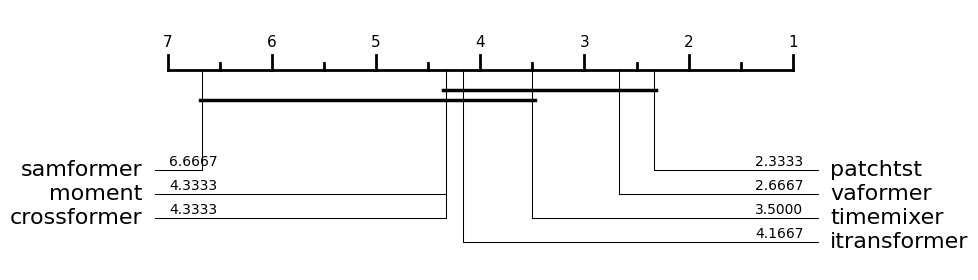

In [14]:
results = merged_df.T
methods = results.columns
plot = plot_critical_difference(results.values, methods, alpha=0.05, width=8, test='nemenyi', lower_better=True)  